## Das Module multiprocessing

Starten Sie die parallelisierten TSP-Berechnungen auf einem Rechner im Labor M2.02 und vergleichen Sie die Rechenzeiten mit der der nicht parallelisierten Version.

In [1]:
import TSP
%matplotlib inline

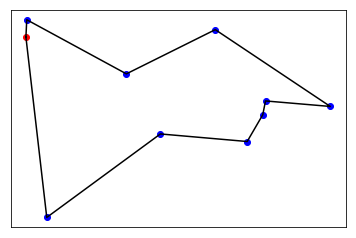

Länge: 3.324022480702365


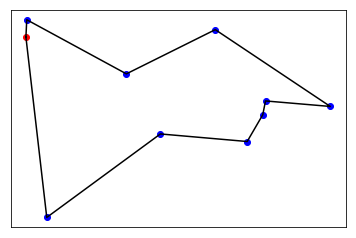

Länge: 3.324022480702365


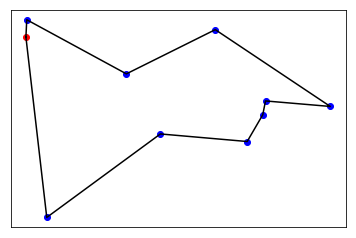

Länge: 3.324022480702365


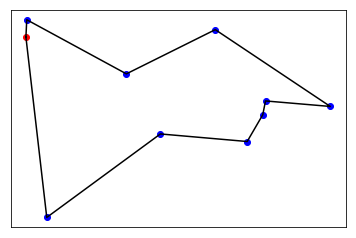

Länge: 3.324022480702365


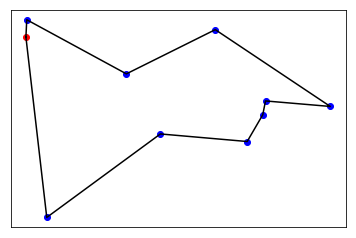

Länge: 3.324022480702365


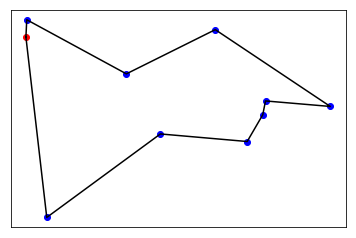

Länge: 3.324022480702365


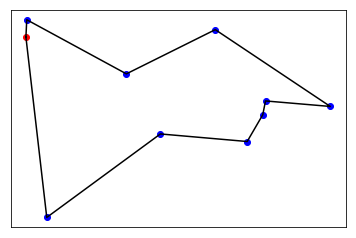

Länge: 3.324022480702365


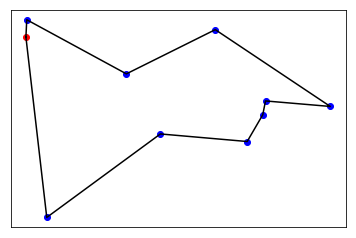

Länge: 3.324022480702365
2.06 s ± 5.51 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [2]:
%%timeit
start_pos, nr_of_cities = 0, 10
end_pos = start_pos + nr_of_cities

result = TSP.shortest_closed_path(((TSP.staedte_positionen[start_pos], ), 
                            TSP.staedte_positionen[start_pos+1:end_pos]))
TSP.plot_closed_path(result[1])
print('Länge:', result[0])

In [3]:
import multiprocessing
import math
nrOfCores = multiprocessing.cpu_count()
print('nrOfCores:', nrOfCores)

def f(qIn, qOut):
    while True:
        x = qIn.get()
        result = x*x
        qOut.put(result)
        qIn.task_done()

if __name__ == '__main__':
    argumentQueue = multiprocessing.JoinableQueue()
    resultQueue = multiprocessing.Queue()
    nrOfProcesses = multiprocessing.cpu_count()
    processes = [multiprocessing.Process(
                            target = f,
                            args = (argumentQueue, resultQueue))
                    for i in range(nrOfProcesses)]
    for i in range(0, 10):
        argumentQueue.put(i)
    for p in processes:
        p.start()  
    argumentQueue.join()
    for p in processes:
        p.terminate()
    for i in range(10):
        print(resultQueue.get(), end=' ')
        
def create_argument_list(path_completed, path_ahead, r_depth, l):
    if len(path_completed) == r_depth:
        l.append((path_completed, path_ahead))
    else:
        for i in range(len(path_ahead)):
            create_argument_list(path_completed + (path_ahead[i],) , 
                                path_ahead[:i] + path_ahead[i+1:],
                                r_depth, l)
            
nr_of_cities = 10
r_depth = 2
l = []
create_argument_list((TSP.staedte_positionen[0], ), 
            TSP.staedte_positionen[1:nr_of_cities], r_depth, l)

import TSP
def worker_TSP(q_in, q_out):
    while True:
        arguments = q_in.get()
        result = TSP.shortest_closed_path(arguments)
        q_out.put(result)
        q_in.task_done()

nrOfCores: 8
0 1 4 9 16 25 36 49 64 81 

In [4]:
%%timeit
in_queue = multiprocessing.JoinableQueue()
result_queue = multiprocessing.Queue()

processes = []
for i in range(nrOfCores):
    p = multiprocessing.Process(target = worker_TSP, 
                                args = (in_queue, result_queue))
    processes.append(p)
    p.start()
    
for parameter_set in l:
    in_queue.put(parameter_set)
    
import time

in_queue.join()

result_list = []
while not result_queue.empty():
    result_list.append(result_queue.get())

min_path = min(result_list)

for p in processes:
    p.terminate()

658 ms ± 8.43 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


```
Multithread
662 ms ± 2.86 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
681 ms ± 15.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
687 ms ± 6.39 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Singlethread
2.12 s ± 38.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.05 s ± 9.05 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
```